# Approach to the problem

1. Load the dataset and Libraries
2. Declare the model
  * Sequential: Sequence of layers
  * Functional: Multi Modal/ Transfer Learning
3. Declare the Layers
  * Dense , Dropout
  * Number of Neurons , Act Function
4. Compile the model
  * Optimizer (SGD , Adam)
  * Loss Function (Cross Entropy , MSE , RMSE)
  * Metrics (Accuracy , F1 , Precision , Recall)
5. Fit the model
  * Pass X Train and Y Train
  * Pass X Test and Y Test
  * Epochs
  * Batch Size
6. Predict and Evaluate the model

# Load data and libraries

In [ ]:
!unzip '/content/archive (6).zip'

Archive:  /content/archive (6).zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense , Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD , Adam

In [ ]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


# Splitting the data

In [ ]:
x = train.drop('label' , axis = 1)
y = train['label']

In [ ]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


# Model evaluation function

In [ ]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

# One hot encode the output

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

# Declare models and layers

In [ ]:
model = Sequential()
model.add(Dense(256 , activation = 'relu' , input_shape = (784,))) # Layer 1 and Input Layer
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(256 , activation = 'relu')) # Layer 2
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(256 , activation = 'relu')) # Layer 3
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(10 , activation = 'softmax')) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

#Fit the model

In [ ]:
hist = model.fit(x_train , y_train_ohe , batch_size = 128 , epochs = 100 , validation_data = (x_test , y_test_ohe))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.5442 - loss: 12.1549 - val_accuracy: 0.7363 - val_loss: 0.7473
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6862 - loss: 0.9014 - val_accuracy: 0.7817 - val_loss: 0.5996
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7451 - loss: 0.7128 - val_accuracy: 0.7817 - val_loss: 0.5619
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7598 - loss: 0.6483 - val_accuracy: 0.8238 - val_loss: 0.5109
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7833 - loss: 0.5907 - val_accuracy: 0.8373 - val_loss: 0.4551
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8001 - loss: 0.5440 - val_accuracy: 0.8306 - val_loss: 0.4687
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8038 - loss: 0.5389 - val_accuracy: 0.8391 - val_loss: 0.4509
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8183 - loss: 0.5043 

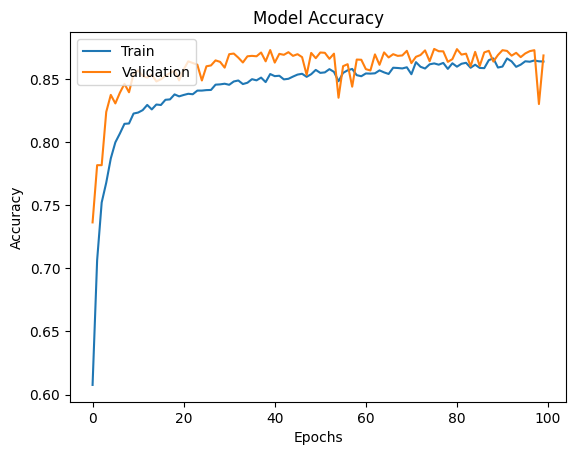

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

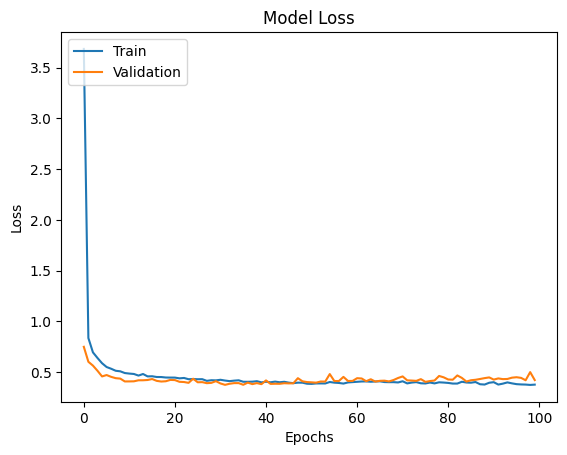

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

# Model evaluation

In [ ]:
y_hat_train_dense = np.argmax(model.predict(x_train) , axis = 1)
y_hat_test_dense = np.argmax(model.predict(x_test) , axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
model_eval(y_train , y_hat_train_dense)

The Accuracy of the Model is: 0.9
[[4044    1   26  121    4    0  610    0   10    0]
 [   4 4753    3   49    3    0    3    0    1    0]
 [  19    0 3933   55  312    0  470    0    1    0]
 [  73    6   10 4442  138    0   82    0    4    0]
 [   2    1  606  153 3439    0  587    0    5    0]
 [   0    0    0    0    0 4790    0   21    0    2]
 [ 437    0  569  132  157    0 3523    0   22    0]
 [   0    0    0    0    0    2    0 4686    0  106]
 [   1    0   16   11    3    0   55    9 4688    0]
 [   0    0    0    0    0    1    0   64    1 4734]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4816
           1       1.00      0.99      0.99      4816
           2       0.76      0.82      0.79      4790
           3       0.90      0.93      0.91      4755
           4       0.85      0.72      0.78      4793
           5       1.00      1.00      1.00      4813
           6       0.66      0.73      0.69      4840
  

In [ ]:
model_eval(y_test , y_hat_test_dense)

The Accuracy of the Model is: 0.87
[[ 948    1    9   33    2    0  182    0    9    0]
 [   2 1156    1   21    0    0    3    0    1    0]
 [   6    1  956   19  100    0  121    1    6    0]
 [  32    7    2 1139   31    0   29    0    5    0]
 [   0    1  135   63  838    0  167    0    3    0]
 [   0    0    1    1    0 1139    0   24    2   20]
 [ 153    0  134   30   47    0  788    0    8    0]
 [   0    0    0    0    0   14    0 1137    2   53]
 [   0    0   13    6    1    1   21    6 1168    1]
 [   0    0    0    0    0    4    0   42    0 1154]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1184
           1       0.99      0.98      0.98      1184
           2       0.76      0.79      0.78      1210
           3       0.87      0.91      0.89      1245
           4       0.82      0.69      0.75      1207
           5       0.98      0.96      0.97      1187
           6       0.60      0.68      0.64      1160
 